## Working with time-series from the USGS
In this notebook we'll walk you through how to access data from the USGS Water Data initiative. We'll look at a USGS stream gage that monitors flows at the White River located at Oglala, South Dakota.

Read more about this USGS stream gage here: https://waterdata.usgs.gov/monitoring-location/06446000/#dataTypeId=daily-00060-0&period=P1Y

## Using ChatGPT to help get started
I used **ChatGPT** to get some hints along the way for this notebook. You can see the conversation I was having with the AI assistant here: https://chatgpt.com/share/6848d44a-d240-8006-8ad8-c6099b76a09d

In [ ]:
!pip install geopandas hvplot geoviews dataretrieval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 22.9 MB/s eta 0:00:00


In [ ]:
# Import python libraries
import dataretrieval.nwis as nwis
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import hvplot.pandas  # This activates .hvplot() on DataFrames

In [ ]:
# Create an interactive map of the USGS station

# Coordinates for USGS station
data = {
    'Site': ['USGS 06446000'],
    'Latitude': [43.25484357],
    'Longitude': [-102.8273511]
}

# Create df and gdf
df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs="EPSG:4326")

# Plot with aerial basemap
gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    kind='points',
    size=100,
    color='blue',
    hover_cols=['Site'],
    width=800,
    height=500,
    title='White River @ Oglala, SD',
    xlim=(-102.81, -102.85),  # Longitude range
    ylim=(43.22, 43.28)       # Latitude range
)


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Site)

In [ ]:
# Define variables for USGS gaging station

site_id = "06446000"  # USGS site number
gage_height = "00065"   # Gage height in feet
discharge = "00060"      # Discharge in cubic feet per second
parameters = [gage_height, discharge]
start_date = "1943-06-01"
end_date = "2024-06-09"
statCd = "00003"  # Daily mean values

In [ ]:
# Create df using data from USGS
df, metadata = nwis.get_dv(sites=site_id, parameterCd=parameters, start=start_date, end=end_date, statCd=statCd)
df

,site_no,00060_Mean,00060_Mean_cd,00065_Mean,00065_Mean_cd,00065_2_Mean,00065_2_Mean_cd
datetime,,,,,,,
1943-06-01 00:00:00+00:00,06446000,671.0,A,NaN,NaN,NaN,NaN
1943-06-02 00:00:00+00:00,06446000,491.0,A,NaN,NaN,NaN,NaN
1943-06-03 00:00:00+00:00,06446000,312.0,A,NaN,NaN,NaN,NaN
1943-06-04 00:00:00+00:00,06446000,304.0,A,NaN,NaN,NaN,NaN
1943-06-05 00:00:00+00:00,06446000,188.0,A,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-06-05 00:00:00+00:00,06446000,38.5,A,5.13,A,5.18,A
2024-06-06 00:00:00+00:00,06446000,37.6,A,5.09,A,5.15,A
2024-06-07 00:00:00+00:00,06446000,35.9,A,5.07,A,5.11,A


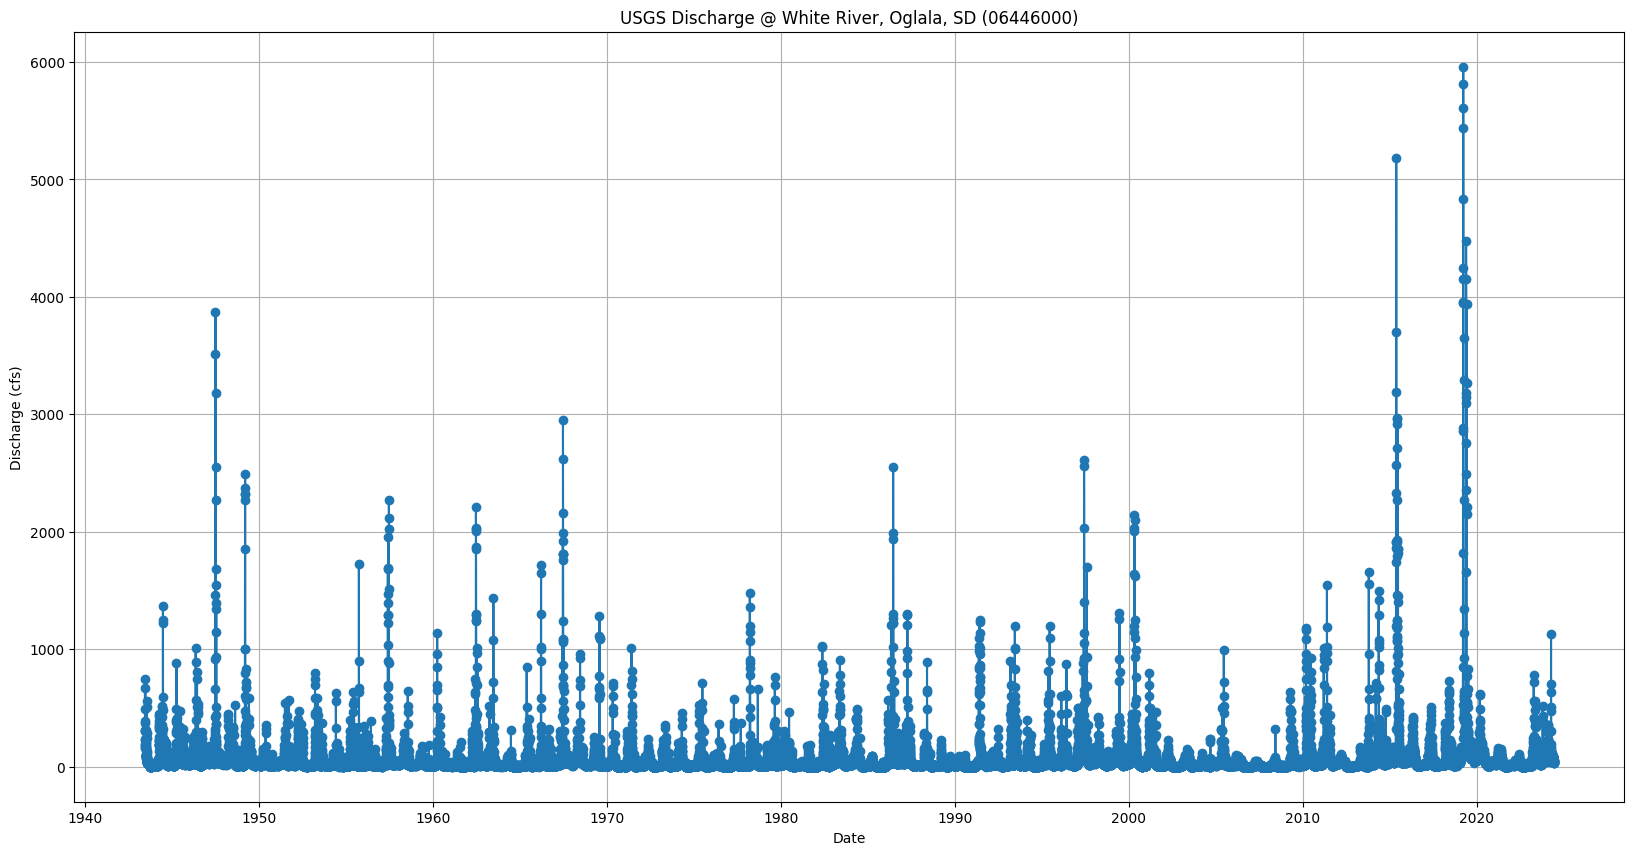

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df["00060_Mean"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Discharge (cfs)")
plt.title("USGS Discharge @ White River, Oglala, SD (06446000)")
plt.grid()
plt.show()

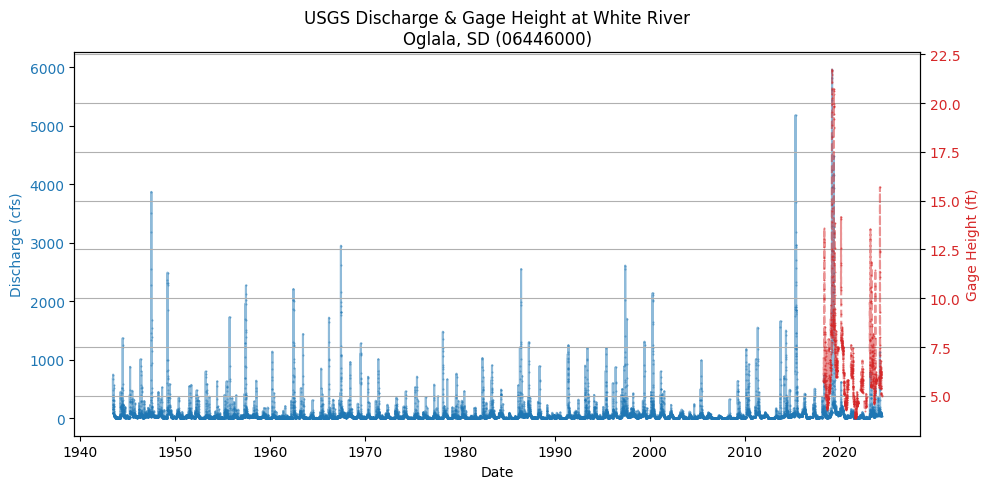

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Gage Height on the first Y-axis (left)
ax1.set_xlabel("Date")
ax1.set_ylabel("Discharge (cfs)", color="tab:blue")
ax1.plot(df.index, df["00060_Mean"], marker="o", linestyle="-", color="tab:blue", label="Discharge", alpha=0.5, markersize=0.5)
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a second Y-axis (right) for Discharge
ax2 = ax1.twinx()
ax2.set_ylabel("Gage Height (ft)", color="tab:red")
ax2.plot(df.index, df["00065_Mean"], marker="s", linestyle="--", color="tab:red", label="Gage Height", alpha=0.5, markersize=0.5)
ax2.tick_params(axis="y", labelcolor="tab:red")

# Add a title and grid
plt.title("USGS Discharge & Gage Height at White River\nOglala, SD (06446000)")
fig.tight_layout()
plt.grid()
plt.show()


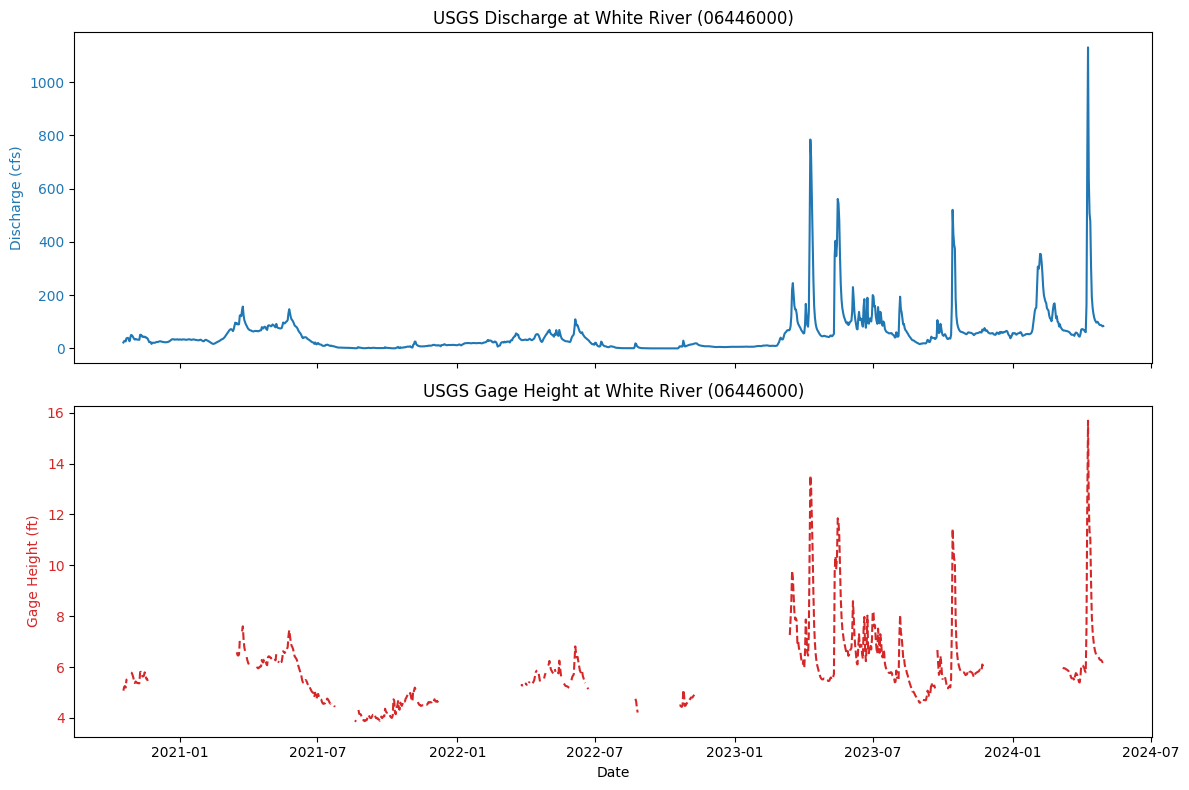

In [ ]:
# Convert index to datetime if not already
df.index = pd.to_datetime(df.index)

# Define date range
start_date = "2020-10-19"
end_date = "2024-04-29"

# Filter the DataFrame
df_filtered = df.loc[start_date:end_date]

# Create two vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Top plot: Discharge
ax1.plot(df_filtered.index, df_filtered["00060_Mean"], color="tab:blue", label="Discharge (cfs)")
ax1.set_ylabel("Discharge (cfs)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_title("USGS Discharge at White River (06446000)")

# Bottom plot: Gage Height
ax2.plot(df_filtered.index, df_filtered["00065_Mean"], color="tab:red", linestyle="--", label="Gage Height (ft)")
ax2.set_ylabel("Gage Height (ft)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")
ax2.set_title("USGS Gage Height at White River (06446000)")
ax2.set_xlabel("Date")

# Format and show
fig.tight_layout()
plt.show()


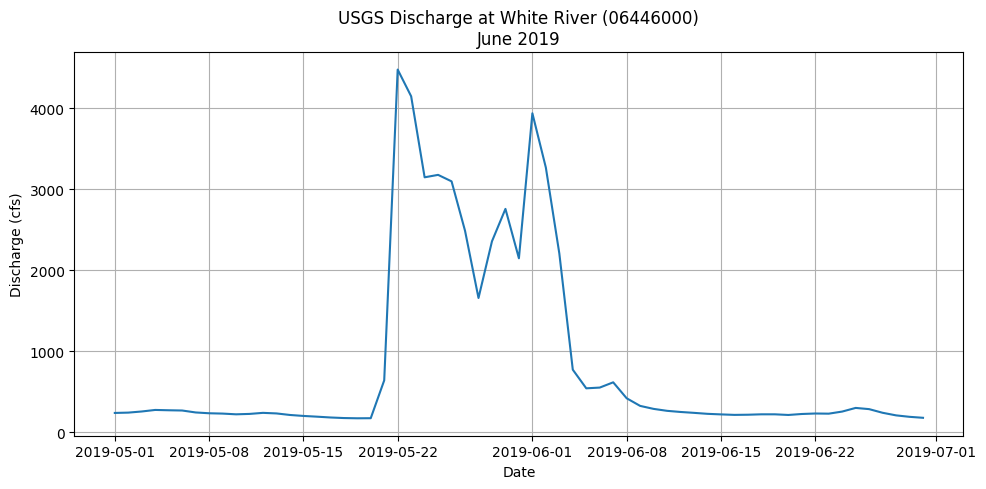

In [ ]:
import matplotlib.pyplot as plt

# Filter for September 2013
start_date = "2019-05-01"
end_date = "2019-06-30"
df_sep2013 = df.loc[start_date:end_date]

# Plot Discharge
plt.figure(figsize=(10, 5))
plt.plot(df_sep2013.index, df_sep2013["00060_Mean"], color="tab:blue", label="Discharge (cfs)")
plt.title("USGS Discharge at White River (06446000)\nJune 2019")
plt.xlabel("Date")
plt.ylabel("Discharge (cfs)")
plt.grid()
plt.tight_layout()
plt.show()